In [33]:
import numpy as np
import pandas as pd
import os 
import seaborn as sns

In [34]:
df = pd.read_csv("/Users/stuti/Downloads/A4DF.csv")
df

,Longitude,Latitude,Speed,NW,RSRP,RSRQ
0,-8.439211,51.877954,86,13 5G,-94,-16
1,-8.439211,51.877954,86,13 5G,-94,-16
2,-8.439211,51.877954,86,13 5G,-86,-22
3,-8.437744,51.878509,84,13 5G,-86,-22
4,-8.437744,51.878509,84,13 5G,-86,-22
...,...,...,...,...,...,...
3668,-8.402547,51.885468,35,11 5G,-79,-21
3669,-8.404152,51.885382,47,11 5G,-79,-21
3670,-8.404152,51.885382,47,11 5G,-79,-21
3671,-8.404152,51.885382,47,11 5G,-79,-21


In [35]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3673 entries, 0 to 3672
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Longitude  3673 non-null   float64
 1   Latitude   3673 non-null   float64
 2   Speed      3673 non-null   int64  
 3   NW         3673 non-null   object 
 4   RSRP       3673 non-null   int64  
 5   RSRQ       3673 non-null   int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 172.3+ KB
None


In [36]:
df.isnull().any()

Longitude    False
Latitude     False
Speed        False
NW           False
RSRP         False
RSRQ         False
dtype: bool

In [37]:
print(df.isnull().sum())

Longitude    0
Latitude     0
Speed        0
NW           0
RSRP         0
RSRQ         0
dtype: int64


In [38]:
print(df["NW"].value_counts())

11 5G    3596
13 5G      57
1 LTE      20
Name: NW, dtype: int64


<AxesSubplot:xlabel='count', ylabel='NW'>

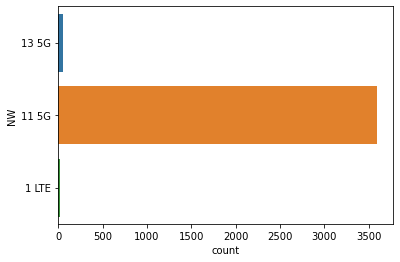

In [39]:
sns.countplot(y=df.iloc[:,3])

<AxesSubplot:>

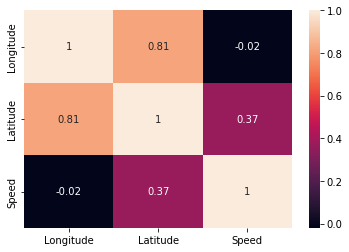

In [40]:
sns.heatmap(df.iloc[:,:3].corr(), annot=True)

In [41]:
df = df.drop_duplicates()

In [42]:
print(df["NW"].value_counts())

11 5G    555
13 5G     32
1 LTE      9
Name: NW, dtype: int64


In [43]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Fit the LabelEncoder on the 'NW' column and transform the data
df.loc[:,'NW'] = le.fit_transform(df['NW'])

/Users/stuti/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [44]:
print(df["NW"].value_counts())

1    555
2     32
0      9
Name: NW, dtype: int64


In [45]:
# Replace empty strings with NaN
df.loc[:,'NW'] = df['NW'].replace('', np.nan)

# Convert 'NW' column to float
df.loc[:,'NW'] = df['NW'].astype(float)

In [46]:
#from sklearn.model_selection import train_test_split
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
#X = df.drop("NW", axis=1)
#y = df["NW"]

#X_train, X_test, y_train, y_test = train_test_split(X, y.iloc[:,1], test_size=0.2, stratify=y.iloc[:,1])

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X = df.drop("NW", axis=1)
y = df["NW"]

X_train, X_test, y_train, y_test = train_test_split(X, y.iloc[:, 1].values, test_size=0.2, stratify=y.iloc[:, 1].values)

IndexingError: Too many indexers

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [49]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [50]:
y_pred = rf.predict(X_test)

NameError: name 'X_test' is not defined

In [51]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

NameError: name 'y_test' is not defined

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
clf = LogisticRegression()
clf.fit(X_train, y_train)


NameError: name 'X_train' is not defined

In [54]:
param_grid = {'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'], 'eta0': np.logspace(-5, 0, num=6)}

In [55]:
sgd = SGDClassifier(loss='log', penalty='l2', random_state=42)

NameError: name 'SGDClassifier' is not defined

In [56]:
grid_search = GridSearchCV(sgd, param_grid, cv=5, scoring='accuracy')

NameError: name 'GridSearchCV' is not defined

In [57]:
grid_search.fit(X_train, y_train)

NameError: name 'grid_search' is not defined

In [58]:
best_sgd = grid_search.best_estimator_
y_pred = best_sgd.predict(X_test)

NameError: name 'grid_search' is not defined

In [59]:

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

NameError: name 'y_test' is not defined

In [60]:
print("Precision:", precision)
print("Recall:", recall)
print('F1 score:', f1)
print('Best parameters:', grid_search.best_params_)

NameError: name 'precision' is not defined

In [61]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

NameError: name 'X_train' is not defined

In [62]:
# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print the results
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)

NameError: name 'y_test' is not defined